<h1> Math 267 </h1>
<h1> Euler's Method Project #1 </h1>
Fall 2021
Robert E. Martin



### Exercise 1.1

Use Excel (see my video posted on YouTube) to obtain an approximate solution to
the initial value problem given below on the interval [0,1.2]. Make a plot of your results. Solve the 
equation using both the Euler’s and Improved Euler’s methods and compare both results to the exact 
solution. Use Δt=0.1.

$$ y' = -y +t ; \;\;\; y(0) = 0.5 $$

Exact solution is: $$ y(t) = 1.5e^{-t} - 1 + t$$

In [74]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt


We proceed by defining the slope function: $$f(t,y) = -y+t$$

Also we "discretize" the domain $[0,1.2]$ and set up an array y to save results.

In [75]:
def f(t,y):
    return -y + t
dt = 0.1
t = np.arange(0,1.3,dt)
y = np.zeros_like(t) # create y array to save results
y_improved = np.zeros_like(t)
y[0]= 0.5  # initial condition
y_improved[0] = 0.5

### Implement Euler's method and save result in array y.

In [76]:
for i in range(len(t)-1):
    y[i+1] = y[i] + f(t[i],y[i])* dt

### Implement Improved Euler's method and save result in array y_improved.

In [77]:
for i in range(len(t)-1):
    F1 = f(t[i],y_improved[i])
    F2 = f(t[i+1],y_improved[i] + F1*dt)
    y_improved[i+1] = y_improved[i] + (F1 + F2)/2* dt

### Plot the results and compare to exact solution.

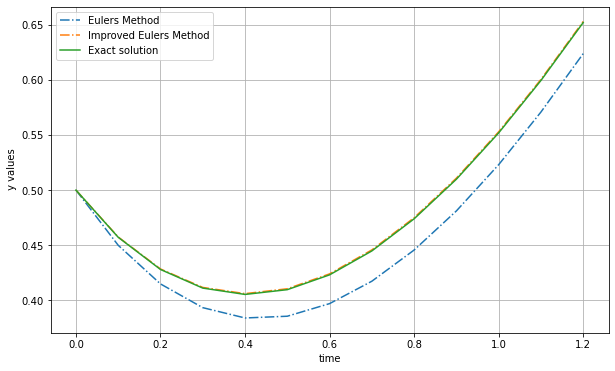

In [78]:
plt.figure(figsize=(10,6))
plt.plot(t,y,'-.',label="Eulers Method");
plt.plot(t,y_improved,'-.',label="Improved Eulers Method");
plt.plot(t,1.5*np.exp(-t)-1+t,label = "Exact solution")
plt.grid()
plt.xlabel("time")
plt.ylabel(" y values")
plt.legend();

## The graph above shows the superiority of the improved method.  The graph of the improved solution basically lies on top of the exact solution.

***

## Exercise 1.2 

Use the improved Euler’s method to obtain the approximate value of y(1.5) for the
solution of the initial value problem:

$$ y' = 2 t y,\;\; y(1) = 1.$$

Compare the results for Δt=0.1 and Δt=0.05. 
Analytically compute the actual value and compare

In [79]:
# define slope function and call it ff(t,y)
def ff(t,y):
    return 2*t*y
t1 = np.arange(1,1.51,0.1)
t2 = np.arange(1,1.51,0.05)
y1 = np.zeros_like(t1); y1[0] = 1
y2 = np.zeros_like(t2); y2[0] = 1

## Implement Improved Euler's method (dt = 0.1) and save results as val1.

In [80]:
for i in range(len(t1)-1):
    F1 = ff(t1[i],y1[i])
    F2 = ff(t1[i+1],y1[i] + F1*dt)
    y1[i+1] = y1[i] + (F1 + F2)/2*0.1
val1= y1[-1]
print(f"The result for dt = 0.1 is {val1}")


The result for dt = 0.1 is 3.4509285071431197


## Implement Improved Euler's method (dt = 0.05) and save results as val2.

In [81]:
for i in range(len(t2)-1):
    F1 = ff(t2[i],y2[i])
    F2 = ff(t2[i+1],y2[i] + F1*0.05)
    y2[i+1] = y2[i] + (F1 + F2)/2*0.05
val2= y2[-1]
print(f"The result for dt = 0.05 is {val2}")


The result for dt = 0.05 is 3.4795415170853614


***

# Solve the ode $$ y' = 2 t  y; \;\; y(1) + 1 $$




$ y' = 2 t y \implies \frac{1}{y} dy = 2t dt \implies  \int \frac{1}{y}dy = \int 2t\;dt \implies  ln(y) = t^2 +c    $ 

$ \implies e^{ln(y)} = Ce^{t^2} \implies y = C e^{t^2} and\;\; y(1) = 1 \implies Ce^1 =1 \implies C = \frac{1}{e} \implies $

$$y(t) = e^{t^{2}-1}$$


In [82]:
y_exact = np.exp(1.5**2-1)
y_exact

3.4903429574618414

## Compute percent difference for dt = 0.1
Below we see a percent difference of 1.13 %

In [83]:
diff1 = abs(val1-y_exact)/y_exact * 100
round(diff1,2)

1.13

# Compute percent difference for dt = 0.05
Below we see a percent difference of 0.31 %

In [84]:
diff2 = abs(val2-y_exact)/y_exact * 100
round(diff2,2)

0.31

http://localhost:8888/notebooks/Euler.ipynb